<a href="https://colab.research.google.com/github/suchisom/Machine-learning-pRak/blob/main/Garment_workerproductivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Analyzing productivity of workers in the garment industry***

In [90]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# ***We will load the dataset***



In [91]:
df = pd.read_csv('data1.csv')

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


# ***Key observations***

# **Data Description by kaggle**

work in progress is less(wip) is 23122 meaning here workers are quite efficient,
despite being 89 workers only 45 men are idle suggesting almost ~55% of workforce are working, max overtime is quite large (25920).
The actual productivity is 1.1(a ratio)


In [ ]:
df["date"].head()


,date
0,1/1/2015
1,1/1/2015
2,1/1/2015
3,1/1/2015
4,1/1/2015


In [ ]:
df["date"].tail()

,date
1192,3/11/2015
1193,3/11/2015
1194,3/11/2015
1195,3/11/2015
1196,3/11/2015


In [ ]:
df["date"].sample(20,random_state = 15)  #20 items from same column at random witih state 14

,date
126,1/8/2015
305,1/18/2015
419,1/25/2015
598,2/3/2015
161,1/10/2015
846,2/19/2015
125,1/7/2015
288,1/17/2015
270,1/15/2015
226,1/13/2015


In [ ]:
df["quarter"].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,248
Quarter3,210
Quarter5,44


In [ ]:
df[df["quarter"] == "Quarter5"]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


In [ ]:
#Quarter5 always consists of dates 31 and 29 as it should coz its the 5th quarter of the month


In [ ]:
df["department"].value_counts()

,count
department,
sweing,691
finishing,257
finishing,249


***Here we have 2 of the same type of "columns", this happens when data has hidden space we can counter this by using .unique() function***

In [ ]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

***Reminder to clean this column(finishing)  with trailing space and without in data cleaning step ***

In [ ]:
df["day"].value_counts()

,count
day,
Wednesday,208
Sunday,203
Tuesday,201
Thursday,199
Monday,199
Saturday,187


***No Fridays on here, possibly factory must have been closed***

In [ ]:
df["team"].value_counts().sort_index()

,count
team,
1,105
2,109
3,95
4,105
5,93
6,94
7,96
8,109
9,104


***So total 12 teams***

Now lets consider Three cases
1. workers met the targeted productivity
2. workers exceed expectations
3. workers were not able to meet expectations due reasons not in their hands

In [ ]:
df[df["actual_productivity"] > df["targeted_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [ ]:
df[df["actual_productivity"] == df["targeted_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


In [ ]:
df[df["actual_productivity"] < df["targeted_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


896 teams exceed expectations, 322 were not able to and 6 teams matched the expectations
***Now lets consider the case where productivity was higher than "1"***

In [ ]:
df[df["actual_productivity"] > 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


In [ ]:
df[df["wip"].notnull()] #removed null values from wip column

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [ ]:
df["over_time"].describe()

,over_time
count,1197.000000
mean,4567.460317
std,3348.823563
min,0.000000
25%,1440.000000
50%,3960.000000
75%,6960.000000
max,25920.000000


In [ ]:
df[df["over_time"] > 4000]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [ ]:
df[df["over_time"] == 0]



,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [ ]:
print(len(df[df["over_time"] == 0]))

31


***Considering only 31 len without overtime lets see when no overtime was done and still productivity was more***

In [ ]:
df[(df["over_time"] == 0) & (df["actual_productivity"] > df["targeted_productivity"])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [ ]:
len(df[(df["over_time"] == 0) & (df["actual_productivity"] > df["targeted_productivity"])])

24

***Only 24 which is rare considering the whole dataset***

In [ ]:
df["incentive"].describe()

,incentive
count,1197.000000
mean,38.210526
std,160.182643
min,0.000000
25%,0.000000
50%,0.000000
75%,50.000000
max,3600.000000


In [ ]:
len(df[df["incentive"] == 0])

604

SO less number of people earning an incentive a primary motivation for workers
:(

In [ ]:
df[df["incentive"] > 50]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
27,1/3/2015,Quarter1,sweing,Saturday,12,0.80,26.16,844.0,7080,63,0.0,0,0,59.0,0.800319
32,1/3/2015,Quarter1,sweing,Saturday,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.787300
45,1/4/2015,Quarter1,sweing,Sunday,9,0.80,26.16,1278.0,7080,60,0.0,0,0,59.0,0.850569
46,1/4/2015,Quarter1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3/10/2015,Quarter2,sweing,Tuesday,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0.850084
1158,3/10/2015,Quarter2,sweing,Tuesday,12,0.80,15.26,1069.0,4080,63,0.0,0,0,34.0,0.800402
1159,3/10/2015,Quarter2,sweing,Tuesday,3,0.80,30.10,756.0,6960,63,0.0,0,1,58.0,0.800072
1178,3/11/2015,Quarter2,sweing,Wednesday,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402


In [ ]:
df[df["incentive"] > 100]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
543,2/1/2015,Quarter1,sweing,Sunday,2,0.80,22.52,1396.0,6900,113,0.0,0,0,57.5,1.000671
544,2/1/2015,Quarter1,sweing,Sunday,1,0.80,22.94,1582.0,3060,113,0.0,0,0,58.5,1.000402
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
581,2/3/2015,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019


In [ ]:
len(df[df["incentive"] > 100])

34

so basically ~600 people have no incentive,~300 do get and 34 dont get at all

***exploring Idle time and idle men column***

In [ ]:
df[df["idle_time"]>0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


In [ ]:
len(df[df["idle_time"]>0])

18

***Lets check if there are idle men during idle time***

In [ ]:
df[(df["idle_time"] > 0) & (df["idle_men"] == 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [ ]:
len(df[df["idle_men"] > 0])

18

***Now we have Performed a "Sanity Check" and verified following***
(a) if idle men are actually idle during idle time
(b) if number idle men are same as idle time
***now that we have confirmed it*** lets see other columns


In [ ]:
df["no_of_style_change"].describe()

,no_of_style_change
count,1197.000000
mean,0.150376
std,0.427848
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [ ]:
df[df["no_of_style_change"] == 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
634,2/5/2015,Quarter1,sweing,Thursday,4,0.50,30.10,417.0,6360,23,0.0,0,1,53.0,0.500720
651,2/7/2015,Quarter1,sweing,Saturday,4,0.60,30.10,486.0,6780,30,0.0,0,1,57.0,0.600224
671,2/8/2015,Quarter2,sweing,Sunday,4,0.65,30.10,712.0,6780,44,0.0,0,1,56.5,0.568260
683,2/9/2015,Quarter2,sweing,Monday,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003
689,2/9/2015,Quarter2,sweing,Monday,7,0.35,30.10,842.0,6960,0,0.0,0,1,58.0,0.350302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [ ]:
df[df["no_of_style_change"] == 2]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
744,2/12/2015,Quarter2,sweing,Thursday,11,0.50,11.41,1039.0,2280,0,0.0,0,2,55.0,0.500123
761,2/14/2015,Quarter2,sweing,Saturday,11,0.60,11.41,1039.0,2280,23,0.0,0,2,55.0,0.600448
777,2/15/2015,Quarter3,sweing,Sunday,11,0.65,11.41,700.0,2640,23,0.0,0,2,53.0,0.650224
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
799,2/16/2015,Quarter3,sweing,Monday,11,0.70,11.41,680.0,2160,30,0.0,0,2,54.0,0.565972
813,2/17/2015,Quarter3,sweing,Tuesday,11,0.70,11.41,1054.0,3420,30,0.0,0,2,56.0,0.700614
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
826,2/18/2015,Quarter3,sweing,Wednesday,11,0.70,11.41,685.0,3360,30,0.0,0,2,56.0,0.821113
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399
854,2/19/2015,Quarter3,sweing,Thursday,11,0.70,11.41,653.0,3480,30,0.0,0,2,58.0,0.700540


In [ ]:
print(len(df[df["no_of_style_change"] == 2]))
len(df[df["no_of_style_change"] == 1])

33


114

***We Checked the number of style changes column, in average only 1 style change was made and only 33 observations in whole dataset***


# ***"no_of_workers" column***

For this column,we will explore different observations that surpass a certain number of workers in each team. An alternative could be to inspect the observations where teams are very small.

Let's use the 75% percentile (57) as a threshold.


In [ ]:
df[df["no_of_workers"] > 57]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
10,1/1/2015,Quarter1,sweing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721127
17,1/1/2015,Quarter1,sweing,Thursday,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.521180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,3/11/2015,Quarter2,sweing,Wednesday,3,0.80,30.10,735.0,6960,63,0.0,0,1,58.0,0.800072
1180,3/11/2015,Quarter2,sweing,Wednesday,11,0.80,11.41,560.0,3420,50,0.0,0,0,58.0,0.800035
1186,3/11/2015,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051


In [ ]:
df[df["no_of_workers"] == 0] #sanity check to see if any teams present with no members

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


# ***Data cleaning (I)***
To Do:
(1)

1.   Remove the trailing space column finishing
2.   Drop date column since it does not contain info about 12 months in a year
3.   Merge Quarter5 with Quarter4 coz it only has 44 observations and a whole column not needed for it
4.   Replace quarter5,4,3,2,1 with 1,2,3,4,5 which is more convinient
5.   Drop wip column
6.   Drop idle men idle time xcoz of only 18 observations
7.   drop Style changes coz of only 1/2
8.   Rounded productivity to 2

In [92]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [93]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].value_counts()

,count
department,
sweing,691
finishing,506


In [94]:
df = df.drop("date", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500


In [95]:
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].value_counts()

,count
quarter,
Quarter1,360
Quarter2,335
Quarter4,292
Quarter3,210


In [96]:
df.loc[df["quarter"] == "Quarter1", "quarter"] = 1
df.loc[df["quarter"] == "Quarter2", "quarter"] = 2
df.loc[df["quarter"] == "Quarter3", "quarter"] = 3
df.loc[df["quarter"] == "Quarter4", "quarter"] = 4
df["quarter"].value_counts()

,count
quarter,
1,360
2,335
4,292
3,210


In [97]:
df["quarter"] = df["quarter"].astype("int")
df[["quarter"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quarter  1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


In [98]:
df = df.drop(["idle_time", "idle_men"], axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0,8.0,0.886500


In [99]:
df = df.drop("wip", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,0,8.0,0.886500


In [100]:
df = df.drop("no_of_style_change",axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500


In [101]:
df["no_of_workers"] = df["no_of_workers"].astype("int")
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500


In [102]:
df["actual_productivity"] = df["actual_productivity"].round(2)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


***since we are building a Classification Tree and not a Regression Tree, our target column "actual_productivity" must be categorical, not numerical.***

***To accomplish this, we will create a new column called "productive". It will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset.***

In [103]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.sample(10, random_state = 14)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
959,4,finishing,Thursday,10,0.70,2.90,3360,0,8,0.41,False
464,4,finishing,Tuesday,8,0.65,3.94,960,0,8,0.85,True
672,2,sweing,Sunday,7,0.70,24.26,6960,0,58,0.36,False
321,3,sweing,Monday,6,0.80,11.41,4380,50,31,0.80,True
282,3,finishing,Saturday,9,0.80,3.94,1800,0,10,0.83,True
307,3,sweing,Sunday,10,0.70,22.52,10080,40,56,0.70,True
609,1,finishing,Wednesday,9,0.75,3.94,960,0,8,0.76,True
1123,2,sweing,Sunday,8,0.60,30.48,6720,0,56,0.60,True
877,4,sweing,Sunday,9,0.70,18.79,3240,30,57,0.63,False
950,4,sweing,Thursday,3,0.75,29.40,6840,45,57,0.75,True


In [104]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

# ***Data Cleaning(II)***

we will apply encoding to out columns

In [105]:
df["department"].replace({"finishing ": 0, "finishing": 0, "sweing": 1}, inplace = True)
df.rename(columns = {"department": "dept_sweing"}, inplace = True) # Also changing column's name here
df.head(10)

/tmp/ipython-input-3392025176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["department"].replace({"finishing ": 0, "finishing": 0, "sweing": 1}, inplace = True)
/tmp/ipython-input-3392025176.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["department"].replace({"finishing ": 0, "fin

,quarter,dept_sweing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
0,1,1,Thursday,8,0.80,26.16,7080,98,59,0.94,True
1,1,0,Thursday,1,0.75,3.94,960,0,8,0.89,True
2,1,1,Thursday,11,0.80,11.41,3660,50,30,0.80,True
3,1,1,Thursday,12,0.80,11.41,3660,50,30,0.80,True
4,1,1,Thursday,6,0.80,25.90,1920,50,56,0.80,True
5,1,1,Thursday,7,0.80,25.90,6720,38,56,0.80,True
6,1,0,Thursday,2,0.75,3.94,960,0,8,0.76,True
7,1,1,Thursday,3,0.75,28.08,6900,45,57,0.75,True
8,1,1,Thursday,2,0.75,19.87,6000,34,55,0.75,True
9,1,1,Thursday,1,0.75,28.08,6900,45,57,0.75,True


For the "quarter" column, we will use "dummies", because if we leave the numbers as they currently are, the Decision Tree would believe that quarter 4 is greater than quarter 1, for example.

In other words, since they are categories instead of ordinal values, every category must have its own column, and the boolean process that we described for the previous column applies here. In case this isn't clear, we will be examining an example after performing the necessary data transformations.

The following code creates the dummies and also removes the original "quarter" column. The prefix parameter adds a "q_" prefix to all columns, so we can easily identify which ones are the dummies. Hence, the result will be to add four new columns to our dataset: "q_1", "q_2", "q_3" and "q_4".

In [106]:
df = pd.concat([df, pd.get_dummies(df["quarter"], prefix = "q")], axis = 1) \
       .drop(["quarter"], axis = 1)
df.sample(10, random_state = 14)

,dept_sweing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4
959,0,Thursday,10,0.70,2.90,3360,0,8,0.41,False,False,False,False,True
464,0,Tuesday,8,0.65,3.94,960,0,8,0.85,True,False,False,False,True
672,1,Sunday,7,0.70,24.26,6960,0,58,0.36,False,False,True,False,False
321,1,Monday,6,0.80,11.41,4380,50,31,0.80,True,False,False,True,False
282,0,Saturday,9,0.80,3.94,1800,0,10,0.83,True,False,False,True,False
307,1,Sunday,10,0.70,22.52,10080,40,56,0.70,True,False,False,True,False
609,0,Wednesday,9,0.75,3.94,960,0,8,0.76,True,True,False,False,False
1123,1,Sunday,8,0.60,30.48,6720,0,56,0.60,True,False,True,False,False
877,1,Sunday,9,0.70,18.79,3240,30,57,0.63,False,False,False,False,True
950,1,Thursday,3,0.75,29.40,6840,45,57,0.75,True,False,False,False,True


In [107]:
df = pd.concat([df, pd.get_dummies(df["day"], prefix= None)], axis=1) \
       .drop(["day"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
959,0,10,0.70,2.90,3360,0,8,0.41,False,False,False,False,True,False,False,False,True,False,False
464,0,8,0.65,3.94,960,0,8,0.85,True,False,False,False,True,False,False,False,False,True,False
672,1,7,0.70,24.26,6960,0,58,0.36,False,False,True,False,False,False,False,True,False,False,False
321,1,6,0.80,11.41,4380,50,31,0.80,True,False,False,True,False,True,False,False,False,False,False
282,0,9,0.80,3.94,1800,0,10,0.83,True,False,False,True,False,False,True,False,False,False,False
307,1,10,0.70,22.52,10080,40,56,0.70,True,False,False,True,False,False,False,True,False,False,False
609,0,9,0.75,3.94,960,0,8,0.76,True,True,False,False,False,False,False,False,False,False,True
1123,1,8,0.60,30.48,6720,0,56,0.60,True,False,True,False,False,False,False,True,False,False,False
877,1,9,0.70,18.79,3240,30,57,0.63,False,False,False,False,True,False,False,True,False,False,False
950,1,3,0.75,29.40,6840,45,57,0.75,True,False,False,False,True,False,False,False,True,False,False


# ***Decision Tree***

In [108]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [109]:


# Feature and target columns

X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]



In [110]:


# Sanity check: first two observations of "y"

y[:2]



,productive
0,True
1,True


In [112]:
# Dividing in training and test sets with train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)


In [113]:


# Instantiating and fitting the Decision Tree Classifier

tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)

tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=24)

In [114]:
y_pred = tree.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))


Accuracy: 0.85


# ***Visualization & Evaluation***

In [116]:
tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([False,  True])

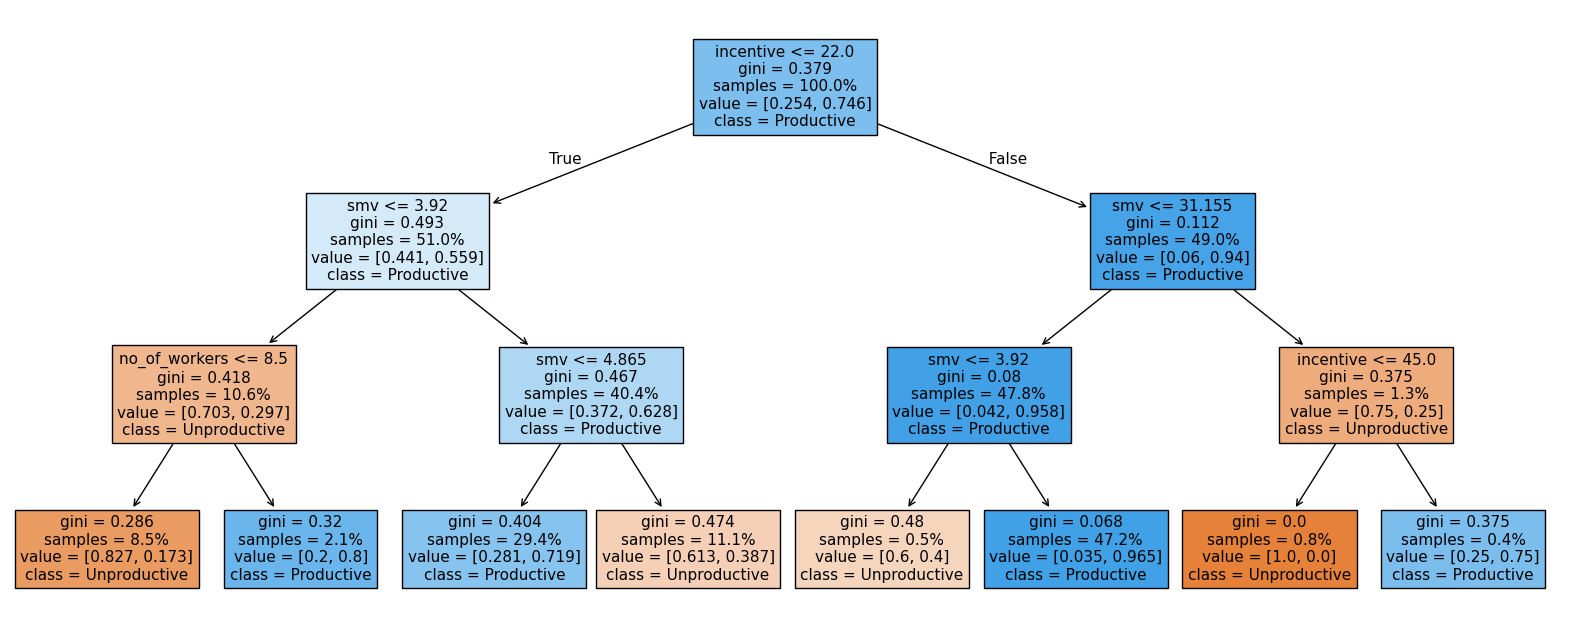

In [117]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree,
              feature_names = X.columns,
              class_names = ["Unproductive", "Productive"],
              filled = True,
              rounded = False,
              proportion = True,
              fontsize = 11)

We can see here that the most significant columns turned out to be "incentive" and "smv" (Standard Minute Value, or the allocated time for a task). All the splits, except one, used these columns to progressively divide the dataset into more homogeneous subsets.

It's important to remember that we pruned the tree when we instantiated the model. We restricted it to only feature a maximum depth of three levels to avoiding overfitting. If we hadn't, it's likely we would've seen other columns further dividing the dataset.

Let's use the model on a hypothetical observation which has an "incentive" of 24 and a "smv" of 5. You don't actually need any code to do this, as you can use the tree visually by following the branches to reach the leaf containing the prediction.

Since the "incentive" is greater than 22, 24 <= 22 evaluates to False at the root node and so we follow the path to the right (False splits always go to the right.) Since the "smv" is less than 31.155, 5 <= 31.155 evaluates to True at the child node below the root and so we follow the path to the left (True splits always go to the left.) In the final split before the leaf, since the "smv" is greater than 3.92, 5 <= 3.92 evaluates to False and so we follow the path to the right where we reach the final leaf node, which happens to feature a "Productive" class.

To summarize, all this means that an observation with those characteristics would be predicted as "Productive" by the Decision Tree.

In [118]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

#[ TN    FP ]
#[ FN    TP]

array([[ 35,  24],
       [ 13, 168]])

In [119]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [120]:
print("Precision:", round(precision_score(y_test, y_pred), 2))

Precision: 0.88


In [121]:
print("Recall:", round(recall_score(y_test, y_pred), 2))

Recall: 0.93


In [122]:
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

F1 Score: 0.9


In [123]:
print("Accuracy:", round(tree.score(X_test, y_test), 2))

Accuracy: 0.85


In [124]:


from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2))



Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]


In [125]:
print("Mean Cross Validation Score:", scores.mean().round(2))

Mean Cross Validation Score: 0.82


In [127]:


from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree,
                             X, y, cv = 10,
                             scoring= ("precision", "recall", "f1") )



In [128]:
multiple_cross_scores["test_precision"].round(2)

array([0.86, 0.9 , 0.83, 0.85, 0.86, 0.87, 0.78, 0.85, 0.86, 0.87])

In [129]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))

Mean Cross Validated Precision: 0.85


In [130]:
multiple_cross_scores["test_recall"].round(2)

array([0.96, 0.94, 0.94, 1.  , 0.99, 0.9 , 0.85, 0.82, 0.94, 0.84])

In [131]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_recall"].mean(), 2))

Mean Cross Validated F1: 0.92


In [132]:
multiple_cross_scores["test_f1"].round(2)

array([0.91, 0.92, 0.88, 0.92, 0.92, 0.88, 0.82, 0.83, 0.9 , 0.86])

In [133]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated F1: 0.88


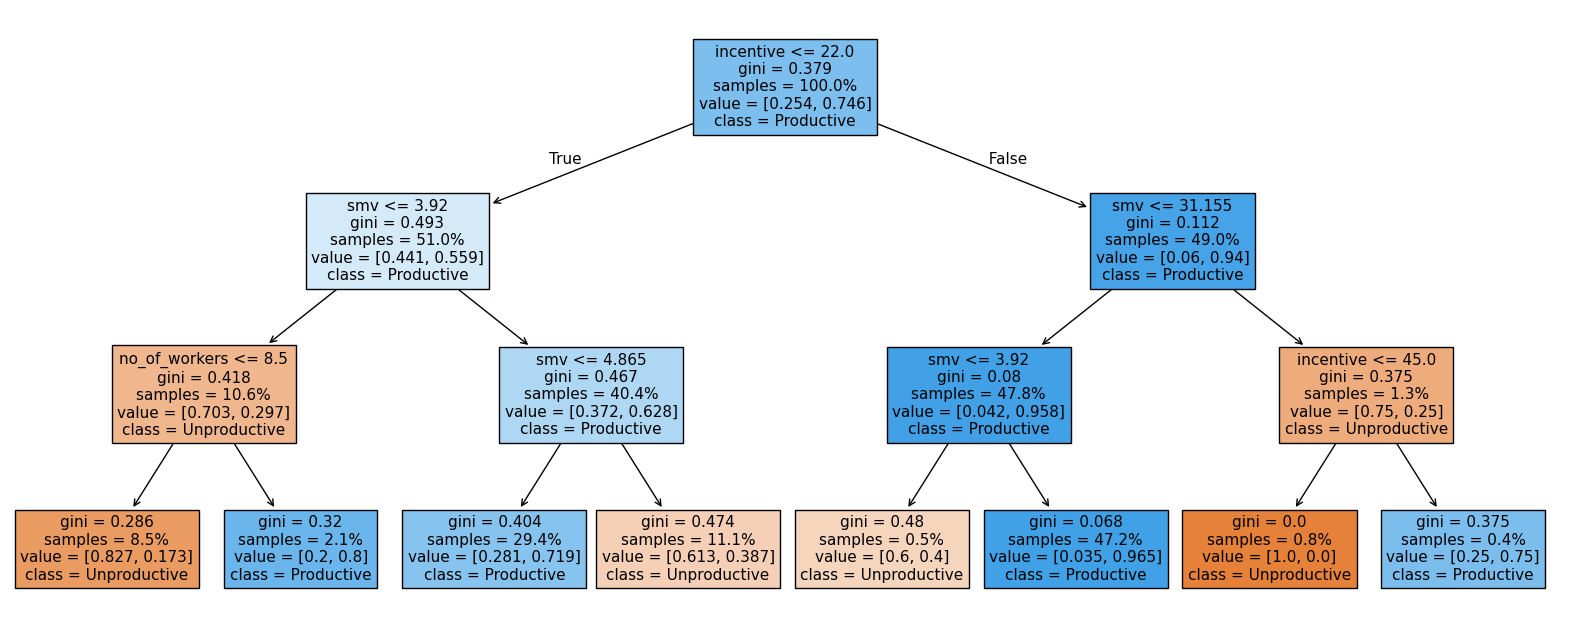

In [134]:


plt.figure(figsize = [20.0, 8.0])

_ = plot_tree(tree,
              feature_names = X.columns,
              class_names = ["Unproductive", "Productive"],
              filled = True,
              rounded = False,
              proportion = True,
              fontsize = 11)



# ***Final Verdict***

The graphic above was created using predictions produced by the algorithm we implemented — a Decision Tree. We chose this algorithm because, despite how intimidating the graphic appears to be, we'll have you interpreting the results in just a few minutes!

The graphic illustrates which aspects of the factory are best at predicting if a team will be productive or not. When we say aspects, we mean variables like the date, department, team number, etc. In our case, we discovered that the "incentive" and the "smv" variables were the ones with the greatest influence on the final prediction. To provide context, the "incentive" variable represents the amount of financial incentive offered to motivate a particular course of action. The "smv" (Standard Minute Value) variable represents the time allocated for a specific task.

How do we know that these two variables are the most predictive? We know this because of the information included in the square boxes in the graphic! For example, if we focus on the top part of each box, we will see that those two variables are the ones that appear most frequently. In fact, there is only a single exception in the lower left of the graphic where the variable "number of workers" appears at the top.

You may be wondering why the algorithm is called a Decision Tree. Well, you can think of the graphic as an inverted tree with the top box, called the "root", representing the most predictive feature and the boxes at the bottom, called the "leaves", which provide the predictions. These final boxes (leaves) are the ones that tell us whether a team in a specific department was productive or not. The prediction is shown in the "class" component at the bottom of the box. Keep in mind, even though all boxes feature a "class" component, we are only interested in the classes found in a leaf, not before.

"But how do I know which path to take from the top box to the final ones?" you might ask. Good question! Basically, we need to use the thresholds associated with every variable at the top of every square box. We have to compare our inputs with those thresholds – starting from the root – until we reach the leaves at the bottom. When we say "input" we are referring to the corresponding "incentives" and "smv" values for a particular team. We can obtain these values from any date we choose in the dataset or we can select the values ourselves to test hypothetical situations. This is excellent for us since it means we can use the Decision Tree to predict the outcome for future and/or hypothetical scenarios so long as we have their respective incentive and SMV values.

We get it, that last part was a bit overwhelming, so to show you how all this works, let's use an example: a fictional date where the "incentive" is 22 and "smv" is 4.44 to predict if a team will be productive or not under these conditions. Starting from the root, we see that our first comparison will be 22 <= 22 when we substitute "incentive" for 22.

So, is 22 less than or equal to 22? Yes! Since the assertion is True, we follow the arrow to the lower left box. This is a universal rule of Decision Trees: if the assertion is True, we continue to the left; otherwise, if it's False, we continue to the right.

True = Left. False = Right.

Now we repeat the process for the rest of the boxes. We apply the same approach to the next box, which has the comparrison 4.44 <= 3.92 after we substitute "smv" for 4.44.

So, is 4.44 less than or equal to 3.92? No! Since the assertion is False, we follow the arrow to the lower right box. Again, after substituting "smv" for 4.44 in that box, our final comparison is 4.44 <= 4.865.

So, is 4.44 less than or equal to 4.865? Yes! Since the assertion is True, we follow the arrow to the final lower left box, the leaf, which predicts the team will be "Productive". In other words, if we have a team with an "incentive" of 22 and a SMV of 4.44, it will be a productive team!

***Random Forest Validation***

In [135]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score = True,
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))


Accuracy: 0.85


In [136]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.84


In [139]:
!jupyter nbconvert --to html /content/Garment_workerproductivity.ipynb

[NbConvertApp] Converting notebook /content/Garment_workerproductivity.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 1190030 bytes to /content/Garment_workerproductivity.html
